<a href="https://colab.research.google.com/github/Muhirwakyeyune/Machine-Learning-projects/blob/main/logistic_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

prepared by muhirwa Salomon

Logistic regression is a supervised machine learning algorithm used for binary classification problems. It is used to predict the probability of an event occurring by modeling the relationship between a dependent binary variable and one or more independent variables. The logistic regression algorithm models this relationship by fitting a logistic function to the input data, which allows the output to be restricted between 0 and 1, thus representing a probability. The model can then predict the probability of a binary outcome based on the input data.

In [57]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_classification

In [58]:
#Load the iris dataset from sklearn
X, y = make_classification(n_features=2, n_redundant=0, 
                           n_informative=2, random_state=1, 
                           n_clusters_per_class=1)
X.shape


(100, 2)

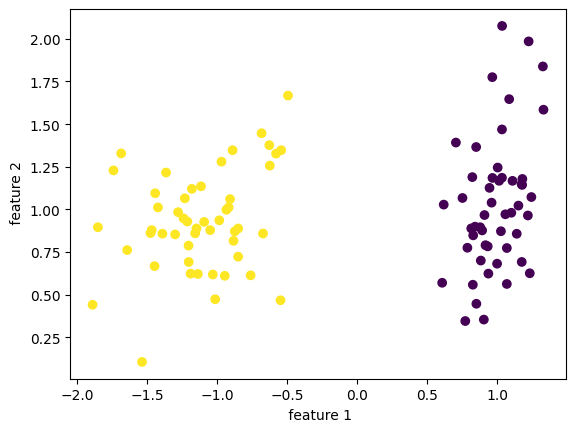

array([[-1.04948638,  0.8786438 ],
       [ 0.8780991 ,  0.89551051],
       [ 0.95928819,  1.03967316],
       [-1.18013412,  1.12062155],
       [-0.90731836,  1.06040861],
       [-0.62754626,  1.37661405],
       [ 0.82178321,  1.18947778],
       [-1.20376927,  0.78801845],
       [ 0.77151441,  0.345716  ],
       [-0.493857  ,  1.66752297],
       [ 1.17456965,  0.69211449],
       [ 0.82798737,  0.84806927],
       [ 0.89189141,  0.87699465],
       [ 0.90394545,  0.35413361],
       [ 0.94459507,  1.12641981],
       [ 0.9317172 ,  0.78344054],
       [-0.96853969,  1.27991386],
       [-1.09230828,  0.92686981],
       [-0.68243019,  1.4468218 ],
       [-0.76045809,  0.61363671],
       [-1.1146902 ,  1.13545112],
       [ 1.32970299,  1.58463774],
       [-1.39003042,  0.85771953],
       [ 1.01313574,  1.16777676],
       [ 1.22382712,  1.98519313],
       [-1.20257258,  0.69174373],
       [ 0.96435056,  1.77547698],
       [ 1.02600767,  0.87226739],
       [ 1.10863359,

In [59]:
#let us visualize the data
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel(' feature 1')
plt.ylabel(' feature 2')
plt.show()
X

In [60]:
def normalize(data):
  mean=np.mean(data)
  std=np.std(data)
  x=(data-mean)/std
  return x

In [61]:
normalize(X)

array([[-1.5713239 ,  0.43739003],
       [ 0.43682257,  0.45496166],
       [ 0.52140485,  0.6051494 ],
       [-1.7074319 ,  0.68948093],
       [-1.42321415,  0.62675146],
       [-1.13174933,  0.95617231],
       [ 0.37815302,  0.76121492],
       [-1.73205485,  0.34297711],
       [ 0.3257833 , -0.11781081],
       [-0.99247269,  1.2592394 ],
       [ 0.74568373,  0.24306496],
       [ 0.38461648,  0.40553767],
       [ 0.4511913 ,  0.43567195],
       [ 0.46374913, -0.1090414 ],
       [ 0.50609764,  0.69552153],
       [ 0.49268156,  0.33820787],
       [-1.48699415,  0.85543066],
       [-1.61593548,  0.48763158],
       [-1.18892707,  1.02931431],
       [-1.27021605,  0.1613073 ],
       [-1.63925283,  0.70493028],
       [ 0.90730066,  1.17289008],
       [-1.92610055,  0.41559125],
       [ 0.57750289,  0.73860694],
       [ 0.79699985,  1.59018618],
       [-1.73080815,  0.24267871],
       [ 0.5266788 ,  1.37170521],
       [ 0.59091278,  0.43074713],
       [ 0.67699195,

In [62]:
def split_data(x,y):
  n=int((len(x)*0.8))
  X_train , X_test=x[:n], x[n:]
  y_train, y_test=y[:n], y[n:]
  return X_train, X_test, y_train, y_test

In [63]:
X_train, X_test, y_train, y_test=split_data(X,y)

In [64]:

 X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 2), (20, 2), (80,), (20,))

In [65]:
def normalize(data):
  mean=np.mean(data)
  std=np.std(data)
  x=(data-mean)/std
  return x

In [79]:
import numpy as np
import matplotlib.pyplot as plt

class lregression:
    def __init__(self, lr=0.002, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.weight = None

    # Add a column of ones to the input data
    def add_ones(self, x):
        ones = np.ones((x.shape[0], 1))
        return np.hstack((ones, x))

    # Compute the sigmoid function
    def sigmoid(self, x):
        z = x @ self.weight
        return 1 / (1 + np.exp(-z))

    # Compute the derivative of the sigmoid function
    def derivative_sigmoid(self, x):
        return self.sigmoid(x) * (1 - self.sigmoid(x))

    # Compute the binary cross-entropy loss function
    def BCELoss(self, x, y_true):
        y_pred = self.sigmoid(x)
        BCE = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
        return BCE

    # Train the logistic regression model
    def fit(self, x, y):
        # Add a column of ones to the input data
        x = self.add_ones(x)
        y = y.reshape(-1, 1)
        n, d = x.shape
        # Initialize the weights to zeros
        self.weight = np.zeros((d, 1))
        train_loss = []
        for epoch in range(self.epochs):
            # Make a prediction using the current weights
            y_pred = self.sigmoid(x)
            # Compute the gradient of the loss function w.r.t. the weights
            grad = x.T@(y_pred - y)
            # Update the weights using the gradient and learning rate
            self.weight -= self.lr * grad
            # Compute the loss for this epoch and store it
            loss = self.BCELoss(x, y)
            train_loss.append(loss)
            # Print the loss every 100 epochs
            if epoch % 100 == 0:
                print(f'Epoch {epoch}: loss = {loss}')
                
    # Compute the predicted probabilities for the input data
    def predict_proba(self, x):
        # Add a column of ones to the input data
        x = self.add_ones(x)
        proba = self.sigmoid(x)
        return proba

    # Compute the predicted class labels for the input data
    def predict(self, x):
        probas = self.predict_proba(x)
        # Convert the predicted probabilities to binary class labels
        output = np.where(probas >= 0.5, 1, 0)
        return output

    # Compute the classification accuracy for the predicted class labels
    def accuracy(self, y_true, y_pred):
        acc = np.mean(y_true == y_pred) * 100
        return acc
    def plot_decision_boundary(self, x, y):
      # plot the decision boundary of the trained logistic regression model
      
      # Find the minimum and maximum values of the first and second features in x
      x_min, x_max = x[:, 0].min() - 0.5, x[:, 0].max() + 0.5
      y_min, y_max = x[:, 1].min() - 0.5, x[:, 1].max() + 0.5
      
      # Create a grid of points ranging from the minimum to maximum feature values, with a step size of 0.02
      xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
      
      # Predict the class of each point in the grid using the trained logistic regression model
      Z = self.predict(np.c_[xx.ravel(), yy.ravel()])
      
      # Reshape the predicted class labels into a grid with the same shape as the input grid
      Z = Z.reshape(xx.shape)
      
      # Plot the decision boundary as a filled contour plot
      plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
      
      # Plot the training data as a scatter plot
      plt.scatter(x[:, 0], x[:, 1], c=y.flatten(), cmap=plt.cm.Spectral)
      
      # Display the plot
      plt.show()


In [89]:
model=lregression(lr=0.001, epochs=1000)
model.fit(X_train,y_train)

Epoch 0: loss = 0.6716042201774576
Epoch 100: loss = 0.1369235301269263
Epoch 200: loss = 0.07523975460724591
Epoch 300: loss = 0.052243463611515474
Epoch 400: loss = 0.04019865428274362
Epoch 500: loss = 0.032765429010421676
Epoch 600: loss = 0.02770963796001094
Epoch 700: loss = 0.024041765831482487
Epoch 800: loss = 0.02125565621555193
Epoch 900: loss = 0.019065219868483658


In [90]:
ypred_train = model.predict(X_train)
acc = model.accuracy(y_train,ypred_train)
print(f"The training accuracy is: {acc}")
print(" ")

The training accuracy is: 50.03125000000001
 


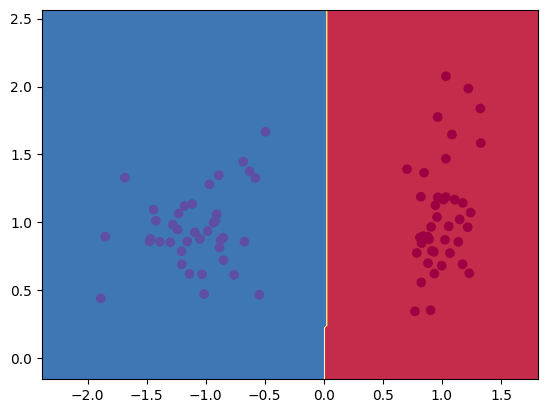

In [91]:
model.plot_decision_boundary(X_train, y_train)